In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 决策树模型

## 信科系2203班  周世祥



# 决策树算法
经典的决策树算法来自 Quinlan，都只能做分类，不能做回归：

• ID3 算法：根据信息增益选择特征，只能处理分类变量数据，没有剪枝的过程。

• C4.5 算法：根据信息增益率来选择特征，增加了剪枝过程，能够将连续特征离散化使用，能够处理缺失数据。

• C5.0 算法：是 C4.5 算法的改进版，引入了 Boosting、代价矩阵、代价敏感树等新技术，速度更快效果更好且更稳健，可以生成决策树或规则集（IF-THEN）。C50 包可以实现该算法。


## 经典决策树算法
**弱学习器**

容易解释

易理解

做分类也可以做回归

决策树是经典的机器学习算法，通过构建树形结构来对数据进行分类或回归。

决策树算法具有易解释、易理解和易实现的优点，但在处理复杂问题时可能会出现过拟合的问题，需要采用剪枝等技术来提高决策树的泛化能力。


决策树需要数据量可以很少，既能处理连续特征也能处理离散特征，且不需要做特征缩放，对缺失值、异常值也不敏感。

使用决策树进行分类的过程，可认为是用 if-then 规则基于特征对样本进行分类的过程：从根节点开始，对样本的某一个特征进行分支条件判断，根据判断结果，将样本点分配到其子节点；此时，每一个子节点对应着该特征的一个取值。如此递归向下移动，直至到达叶节点，最后将样本分配到叶节点的类中。

以对西瓜分类为例：


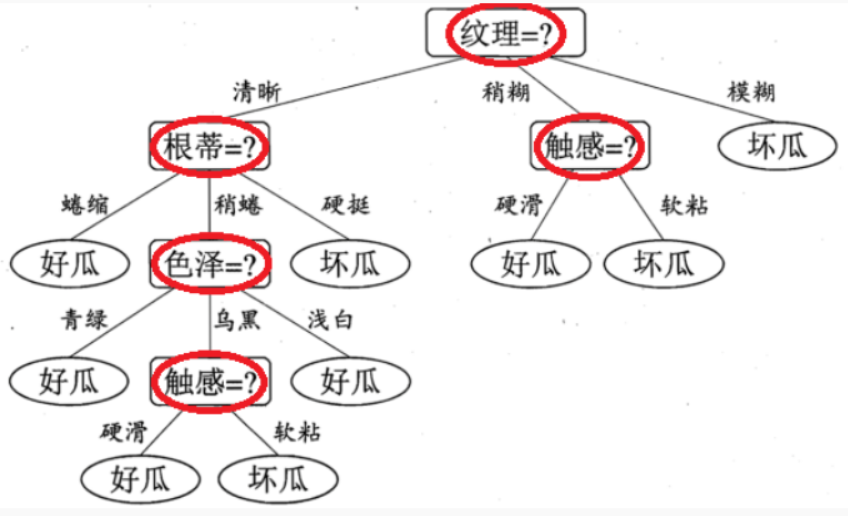 

红圈是特征，位于中间节点。

椭圆为叶节点。

样本点都落在叶节点里。

问题：怎么选择特征，第一个节点为什么是纹理？

上图完整表达了选择一个好西瓜的策略（决策树），其中内部节点（方框）表示判断条件，叶节点（椭圆框）表示决策结果，有向边（连线）表示在各判断条件下不同情况的决策路径。

有了该决策树后，比如买到一个西瓜，其特点是纹理是清晰，根蒂是硬挺的瓜，就可以判断是好瓜还是坏瓜：先看文理，文理清晰，往左走再看根蒂，根蒂硬挺，得到结论是坏瓜。


## 选择特征
问题的关键是，怎么从样本数据出发构建出这个决策树结构。
```
library(tidyverse)
df = readxl::read_xlsx("data/watermelon.xlsx")

通过百度网盘分享的文件：watermelon.xlsx
https://pan.baidu.com/s/1ANikqUjNEKoSxI_aS6jSaQ?pwd=6868 
```


In [10]:
library(tidyverse)
# shift +enter

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


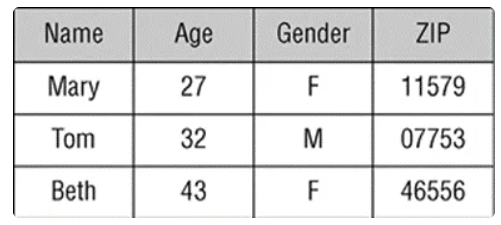

$x^2+y_1*y_2+\sqrt{x^2-1}$

In [1]:
library(readxl)
df=read_xlsx("/kaggle/input/watermelon/watermelon.xlsx")

In [5]:
glimpse(date)

Rows: 17
Columns: 9
$ 色泽   <chr> "青绿", "乌黑", "乌黑", "青绿", "浅白", "青绿", "乌黑", "乌黑",…
$ 根蒂   <chr> "蜷缩", "蜷缩", "蜷缩", "蜷缩", "蜷缩", "稍蜷", "稍蜷", "稍蜷",…
$ 敲声   <chr> "浊响", "沉闷", "浊响", "沉闷", "浊响", "浊响", "浊响", "浊响",…
$ 纹理   <chr> "清晰", "清晰", "清晰", "清晰", "清晰", "清晰", "稍糊", "清晰",…
$ 脐部   <chr> "凹陷", "凹陷", "凹陷", "凹陷", "凹陷", "稍凹", "稍凹", "稍凹",…
$ 触感   <chr> "硬滑", "硬滑", "硬滑", "硬滑", "硬滑", "软粘", "软粘", "硬滑",…
$ 密度   <dbl> 0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, …
$ 含糖率 <dbl> 0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, …
$ 好瓜   <chr> "是", "是", "是", "是", "是", "是", "是", "是", "否", "否", "否…


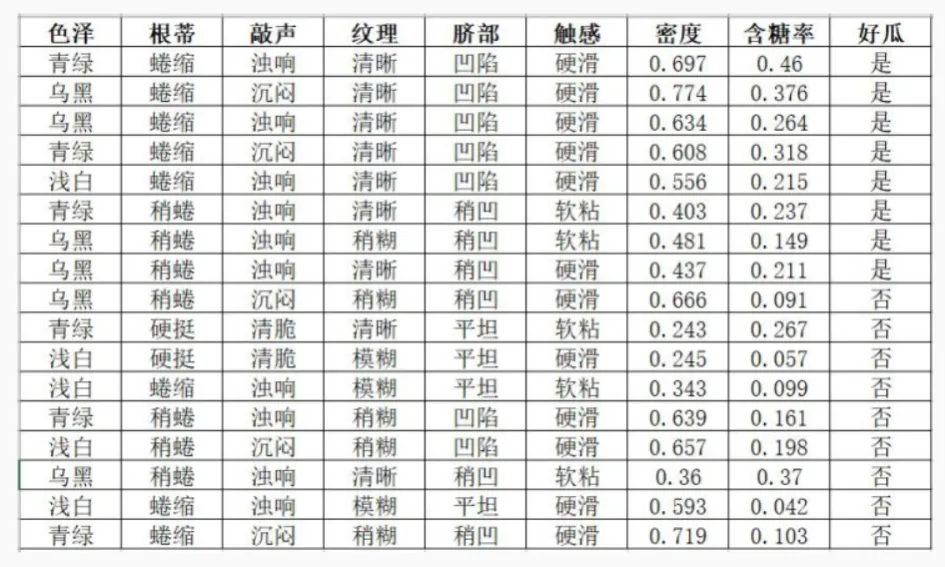

两个连续特征。开始先不用。

前文西瓜决策过程图，根节点和每一层的内部节点，都是选择不同的特征，根据其特征的不同属性值进行分裂，依次一直到叶节点。那么，在第一次选择特征的时候，为什么选择的是纹理，而不选择触感或其他呢？这也是构建决策树的关键步骤：以什么标准来选择特征。



In [2]:
library(mlr3verse)

Loading required package: mlr3



In [3]:
lrn()

<DictionaryLearner> with 49 stored values
Keys: classif.cv_glmnet, classif.debug, classif.featureless,
  classif.glmnet, classif.kknn, classif.lda, classif.log_reg,
  classif.multinom, classif.naive_bayes, classif.nnet, classif.qda,
  classif.ranger, classif.rpart, classif.svm, classif.xgboost,
  clust.agnes, clust.ap, clust.cmeans, clust.cobweb, clust.dbscan,
  clust.dbscan_fpc, clust.diana, clust.em, clust.fanny,
  clust.featureless, clust.ff, clust.hclust, clust.hdbscan,
  clust.kkmeans, clust.kmeans, clust.MBatchKMeans, clust.mclust,
  clust.meanshift, clust.optics, clust.pam, clust.SimpleKMeans,
  clust.xmeans, regr.cv_glmnet, regr.debug, regr.featureless,
  regr.glmnet, regr.kknn, regr.km, regr.lm, regr.nnet, regr.ranger,
  regr.rpart, regr.svm, regr.xgboost

### 熵
特征选择是希望选取对训练数据具有更好分类能力的特征（分支后组内的数据更为” 一致”，或者叫” 纯度” 更高），这样可以提高决策树模型的性能。下面就以西瓜分类为例阐释若干概念。

“一致” 的对立面就是” 混乱”，“熵” 就是度量混乱、不确定性的一个量，它越大越混乱，越小越” 一致”。

离散型随机变量 𝑋 的概率分布为 $𝑃(𝑋 = 𝑥_i) = 𝑝_i$, i= 1, ⋯, 𝑛，则其熵定义为

$$H(X)=-\sum_{i=1}^np_i\ln p_i$$
对于数据集 𝐷, $p_k=\frac{|D_k|}{|D|}$
表示第 k 类样本所占的比例，则 𝐷 的经验熵为：
$$H(D)=-\sum_{k=1}^K\frac{|D_k|}{|D|}\ln \frac{|D_k|}{|D|}$$
计算熵时以 2 为底还是以 𝑒 为底只相差一个常数，不影响最小化，故机器学习领域都用 ln.




In [4]:
options(digits=3)

In [6]:
options(digits=3)
calEntropy = function(Y) {
# 计算因变量 Y 分组下的经验熵
p = table(Y) / length(Y)
-sum(p * log2(p))
}
#计算好瓜的经验熵：
HD = calEntropy(df$好瓜)
HD
 

[1] 0.998

### 条件熵
条件熵 H(𝑌 |𝑋) 表示在随机变量 𝑋 已知条件下随机变量 𝑌 的不确定性，
定义为 𝑋 给定条件下 𝑌 的条件概率分布的熵对 𝑋 的数学期望：
$$H(Y|X)=\sum_{i=1}^np_iH(Y|X=x_i)$$
其中，$p_i=P(X=x_i),i=1,\cdots,n$,
计算特征 𝐴 对数据集 𝐷 的经验条件熵：$$H(D|A)=\sum_{i=1}^n\frac{|D_i|}{|D|}H(D_i)$$

In [13]:
calCondEntropy = function(A, Y) {
# 计算特征 A 条件下因变量 Y 的经验条件熵 H(Y|A)
p = table(A) / length(A)
H = tapply(Y, A, calEntropy)
sum(p * H)
}
#计算各个特征对因变量 Y 的经验条件熵：
HDA = map_dbl(df[1:6], \(x) calCondEntropy(x, df$好瓜))
HDA %>% round(3)
 

色泽  根蒂  敲声  纹理  脐部  触感 
0.889 0.855 0.857 0.617 0.708 0.991

 ### 信息增益
信息增益表示因得知特征 𝑋 信息而使得 𝑌 信息不确定性减少的程度。
特征 𝐴 对数据集 𝐷 的信息增益 𝑔(𝐷,𝐴)，定义为数据集 𝐷 的经验熵与特征 𝐴 给定条件下 𝐷 的经验条件熵之差（也叫互信息）：

𝑔(𝐷,𝐴) = H(𝐷) − H(𝐷|𝐴)

信息增益大的特征具有更强的分类能力。根据信息增益准则的特征选择方法是：对训练数据集（或子集）计算其每个特征的信息增益，选择信息增益最大的特征。

计算 6 种特征” 色泽”, “根蒂”, “敲声”, “纹理”, “脐部”, “触感” 的信息增益：


In [14]:

gDA = HD - HDA
gDA



色泽    根蒂    敲声    纹理    脐部    触感 
0.10813 0.14267 0.14078 0.38059 0.28916 0.00605

可见，“纹理” 的信息增益最大，所以可选作第一个分类特征（但仍不够科学）。
### 信息增益率
作为绝对量，信息增益是有缺陷的，因为它对可取值较多的特征有所偏好！将信息增益除以该特征的经验熵做标准化，得到相对量就是信息增益率：
$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$
一个类别如果分类很多，熵肯定大。

其中， $H_A(D)=-\sum_{i=1}^{n_A}\frac{|D_i|}{|D|}\ln \frac{|D_i|}{|D|}$
为特征 𝐴 的经验熵, $𝑛_𝐴$ 表示特征 𝐴的水平数。

In [15]:
HA = map_dbl(df[1:6], calEntropy)
gDA / HA
 

色泽    根蒂    敲声    纹理    脐部    触感 
0.06844 0.10176 0.10563 0.26309 0.18673 0.00692

信息增益率结果表明，应该选择 “纹理” 作为决策树第一个分类特征。
根据 “纹理”，从根节点（全部数据）分裂为 3 棵子树（数据子集），每棵子树做同样的选择特征，继续往下分裂，直到构建完成整棵决策树。

## CART 算法
以上决策树算法，基于熵涉及大量对数运算，只能做分类。1984 年，Breiman 等提出了 CART（分类回归树）算法，用 Gini 不纯度来代替熵，递归地构建二叉树。

离散型随机变量 𝑋 的概率分布为 $𝑃(𝑋 = 𝑥_i) = 𝑝_i$, i = 1, ⋯, 𝑛，则其Gini 不纯度定义为

$$Gini(X)=\sum_{i=1}^np_i(1-p_i)=1-\sum_{i=1}^np_i^2$$

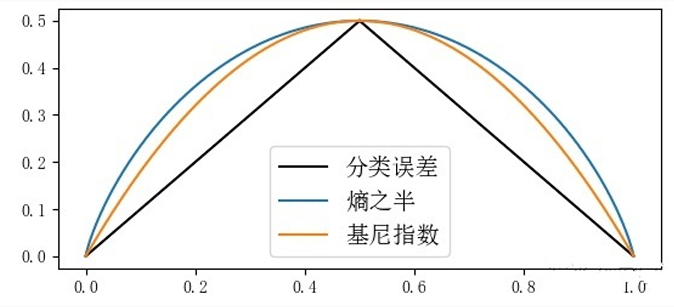

Gini 不纯度与熵之半对比

可见，Gini 不纯度和熵之半的曲线非常接近，仅仅在 45 度角附近误差稍大。

因此，Gini 不纯度可以做为熵的一个近似替代。

对于数据集 𝐷，$p_k=\frac{|D_k|}{|D|}$
表示第 k类样本所占比例，则 𝐷 的 Gini 不纯
度为：
$$ Gini(D)=1-\sum_{k=1}^K(\frac{|D_k|}{|D|})^2$$



In [16]:
calGini = function (Y) {
# 计算 Y 分组下的 Gini 不纯度
p = table (Y) / length (Y)
1 - sum (p ^ 2)
}

计算好瓜的基尼不纯度


In [17]:
calGini(df$好瓜)

0.498 #大约是熵的一半

[1] 0.498

[1] 0.498

若数据集 𝐷 根据特征 𝐴 是否取某一可能值 𝑎 被分裂成 𝐷_1 和 𝐷_2 两部分，则在特征 𝐴 条件下，数据集 𝐷 的条件 Gini 不纯度定义为：
$$Gini(D,A=a)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)$$
应该写成Gini(D,A=a)更合适。a取遍纹理清晰，模糊，稍糊三种情况。

Gini(𝐷) 表示数据集 𝐷 的不确定性，Gina(𝐷,𝐴=a) 表示经 𝐴 = 𝑎 分裂后数据集 𝐷 的不确定性。Gini 不纯度越大，数据集的不确定性越大，这与熵类似。

In [18]:
CalCondGini = function(data, var, Y) {
# 计算在特征 var 下, 因变量 Y 分组的条件 Gini 不纯度
val = unique(data[[var]])
n = length(val)
rlt = numeric(n)
for(i in 1:n) {
ind = data[[var]] == val[i]
p = table(ind) / length(ind)
g = tapply(data[[Y]], ind, calGini)
rlt[[i]] = sum(p * g)
}
names(rlt) = val
rlt
}

计算 6 个特征下好瓜的条件 Gini 不纯度：

In [20]:
map(names(df)[1:6],
\(x) CalCondGini(df, x, "好瓜")) %>%
set_names(names(df)[1:6])

$色泽
 青绿  乌黑  浅白 
0.497 0.456 0.437 

$根蒂
 蜷缩  稍蜷  硬挺 
0.456 0.496 0.439 

$敲声
 浊响  沉闷  清脆 
0.450 0.494 0.439 

$纹理
 清晰  稍糊  模糊 
0.286 0.437 0.403 

$脐部
 凹陷  稍凹  平坦 
0.415 0.497 0.362 

$触感
 硬滑  软粘 
0.494 0.494

可见，特征 “纹理”= 清晰的 Gini 不纯度 = 0.286 最小，应该选择” 纹理”作为第一个分类特征，根据其是否为” 清晰” 做二叉分支。
再依次对这两个分支分别做上述计算，选择下一层的二叉分支，依次类推直到所得节点都为叶节点。

如果不做剪枝，会一直往下分，二叉树。

 ### 处理连续特征
以上是只考虑分类特征，连续特征怎么处理？仍以西瓜数据为例，考虑连续特征密度，计算步骤如下：

• 将密度唯一值从小到大排序，计算两两相邻点的中点（均值），分别作为切分点；

• 每个切分点将密度切分为两类（是否 < 切分点）：TRUE 类和FALSE 类；

• 计算条件 Gini 不纯度，最小的条件条件 Gini 不纯度对应的切分点，就是首选的最佳切分点。

• 根据切分点 x 计算连续特征 var 的条件 Gini 不纯度

所以决策树树可以输入数值特征。比如瓜的密度，含糖量。


In [21]:

SplitGini = function(data, y, var, x) {
data %>%
mutate(splits = .data[[var]] < x) %>%
CalCondGini("splits", y)
}


```
生成切分点，再用数据思维完成循环迭代计算：
v = unique(df$密度) |> sort() # 从小到大排序
cp = (v[-1] + v[-length(v)]) / 2 # 计算两两相邻均值
```


In [23]:
v = unique(df$密度) |> sort() # 从小到大排序
cp = (v[-1] + v[-length(v)]) / 2 # 计算两两相邻均值
cp

[1] 0.244 0.294 0.352 0.382 0.420 0.459 0.518 0.575 0.601 0.621 0.637 0.648
[13] 0.661 0.681 0.708 0.746

In [25]:
tibble(cp) %>%
mutate(Gini = map(cp,
\(x) SplitGini(df, "好瓜", "密度", x))) %>%
unnest_wider(Gini) %>%
slice_min(`FALSE`, n = 3) # 选取最小的 3 个
 


cp,FALSE,TRUE
<dbl>,<dbl>,<dbl>
0.382,0.362,0.362
0.352,0.403,0.403
0.420,0.437,0.437


可见，对于密度特征，选取 0.382 作为切分点，条件 Gini 不纯度最小为0.362。当然，实际计算还需要遍历其它连续特征、以及分类特征，选择最佳的切分特征和最佳切分点。

## CART 回归
目标是连续变量时。
CART 回归是根据最小化均方误差进行特征选择，生成二叉树，也称为最小二乘回归树。

## 参考文献

限于篇幅，原理自己去看文献：

https://www.yuque.com/sdutzhou/durg6g/gmt49y2ybvgpn1gq?singleDoc# 《机器学习概论》  深度学习笔记(周志华西瓜书)

https://github.com/Vay-keen/Machine-learning-learning-notes/blob       

https://github.com/jindongwang/MachineLearning